In [63]:
import numpy as np
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.datasets import mnist
import cv2
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, model_from_json
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import img_to_array, load_img
import random
from tensorflow.keras.utils import plot_model
import netron

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
y_train = tf.one_hot(y_train, 10)

In [8]:
y_test = tf.one_hot(y_test, 10)

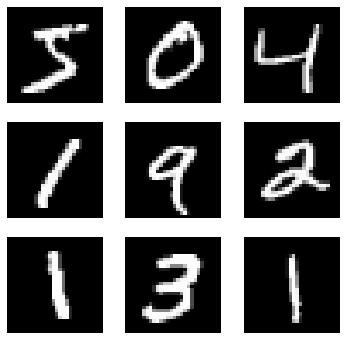

In [8]:
cnt = 0
fig, ax = plt.subplots(3, 3, figsize=(6,6))
for i in range(3):
    for j in range(3):
        img = X_train[cnt]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i][j].imshow(img)
        ax[i][j].axis('off')
        cnt += 1

In [9]:
model  = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=2, pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=2, pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=2, pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       1

In [11]:
es = EarlyStopping(monitor="val_loss",
                    min_delta=0,
                    patience=10,
                    verbose=1,
                    mode="auto",
                    restore_best_weights=True)

In [12]:
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy',  metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/100
1875/1875 [==============================] - 82s 31ms/step - loss: 0.4751 - accuracy: 0.8511 - val_loss: 0.0696 - val_accuracy: 0.9780
Epoch 2/100
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1423 - accuracy: 0.9564 - val_loss: 0.0456 - val_accuracy: 0.9841
Epoch 3/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1121 - accuracy: 0.9652 - val_loss: 0.0464 - val_accuracy: 0.9852
Epoch 4/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0942 - accuracy: 0.9712 - val_loss: 0.0377 - val_accuracy: 0.9873
Epoch 5/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0840 - accuracy: 0.9745 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 6/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0758 - accuracy: 0.9764 - val_loss: 0.0371 - val_accuracy: 0.9879
Epoch 7/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0

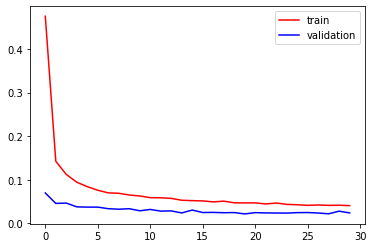

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

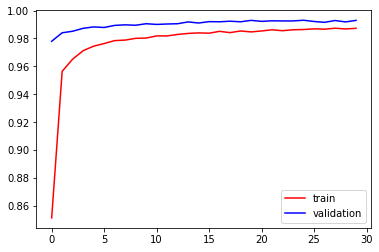

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnist_model.h5")
print("Saved model to disk")

Saved model to disk


In [42]:
test_input = np.reshape(X_train[0], (28, 28, 1))

In [43]:
test_input.shape

(28, 28, 1)

In [31]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [2]:
# load json and create model
json_file = open('mnist_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("mnist_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [13]:
X_train[0].shape

(28, 28)

In [37]:
# load and prepare the image
def load_image(cnt):
    # load the image
    #img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    img = X_test[cnt]
    ax[i][j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i][j].axis("off")
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    return str(digit)

1/1 [==============================] - 0s 54ms/step


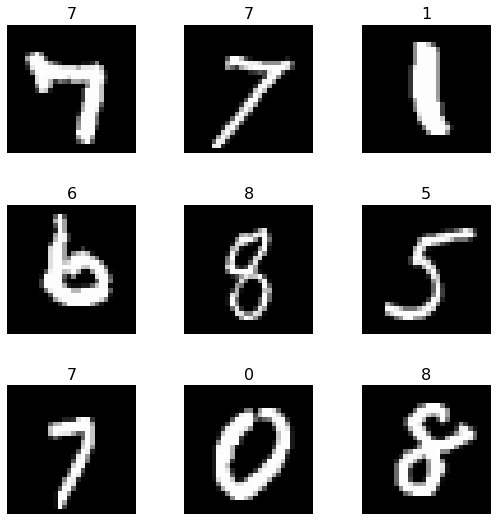

In [58]:
cnt = 0
fig, ax = plt.subplots(3, 3, figsize=(9,9))
plt.subplots_adjust(hspace = 0.4)
for i in range(3):
    for j in range(3):
        cnt = int(random.uniform(0, 10000))
        img = X_test[cnt]
        ax[i][j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i][j].axis("off")
        ax[i][j].set_title(load_image(cnt), fontsize=16)
plt.show()

In [62]:
!pip install netron

     ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00


In [64]:
netron.start('mnist_model.h5')

Serving 'mnist_model.h5' at http://localhost:8080


('localhost', 8080)